In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

# Graph properties

In [4]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

In [5]:
# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

# Shortest path


In [6]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [7]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


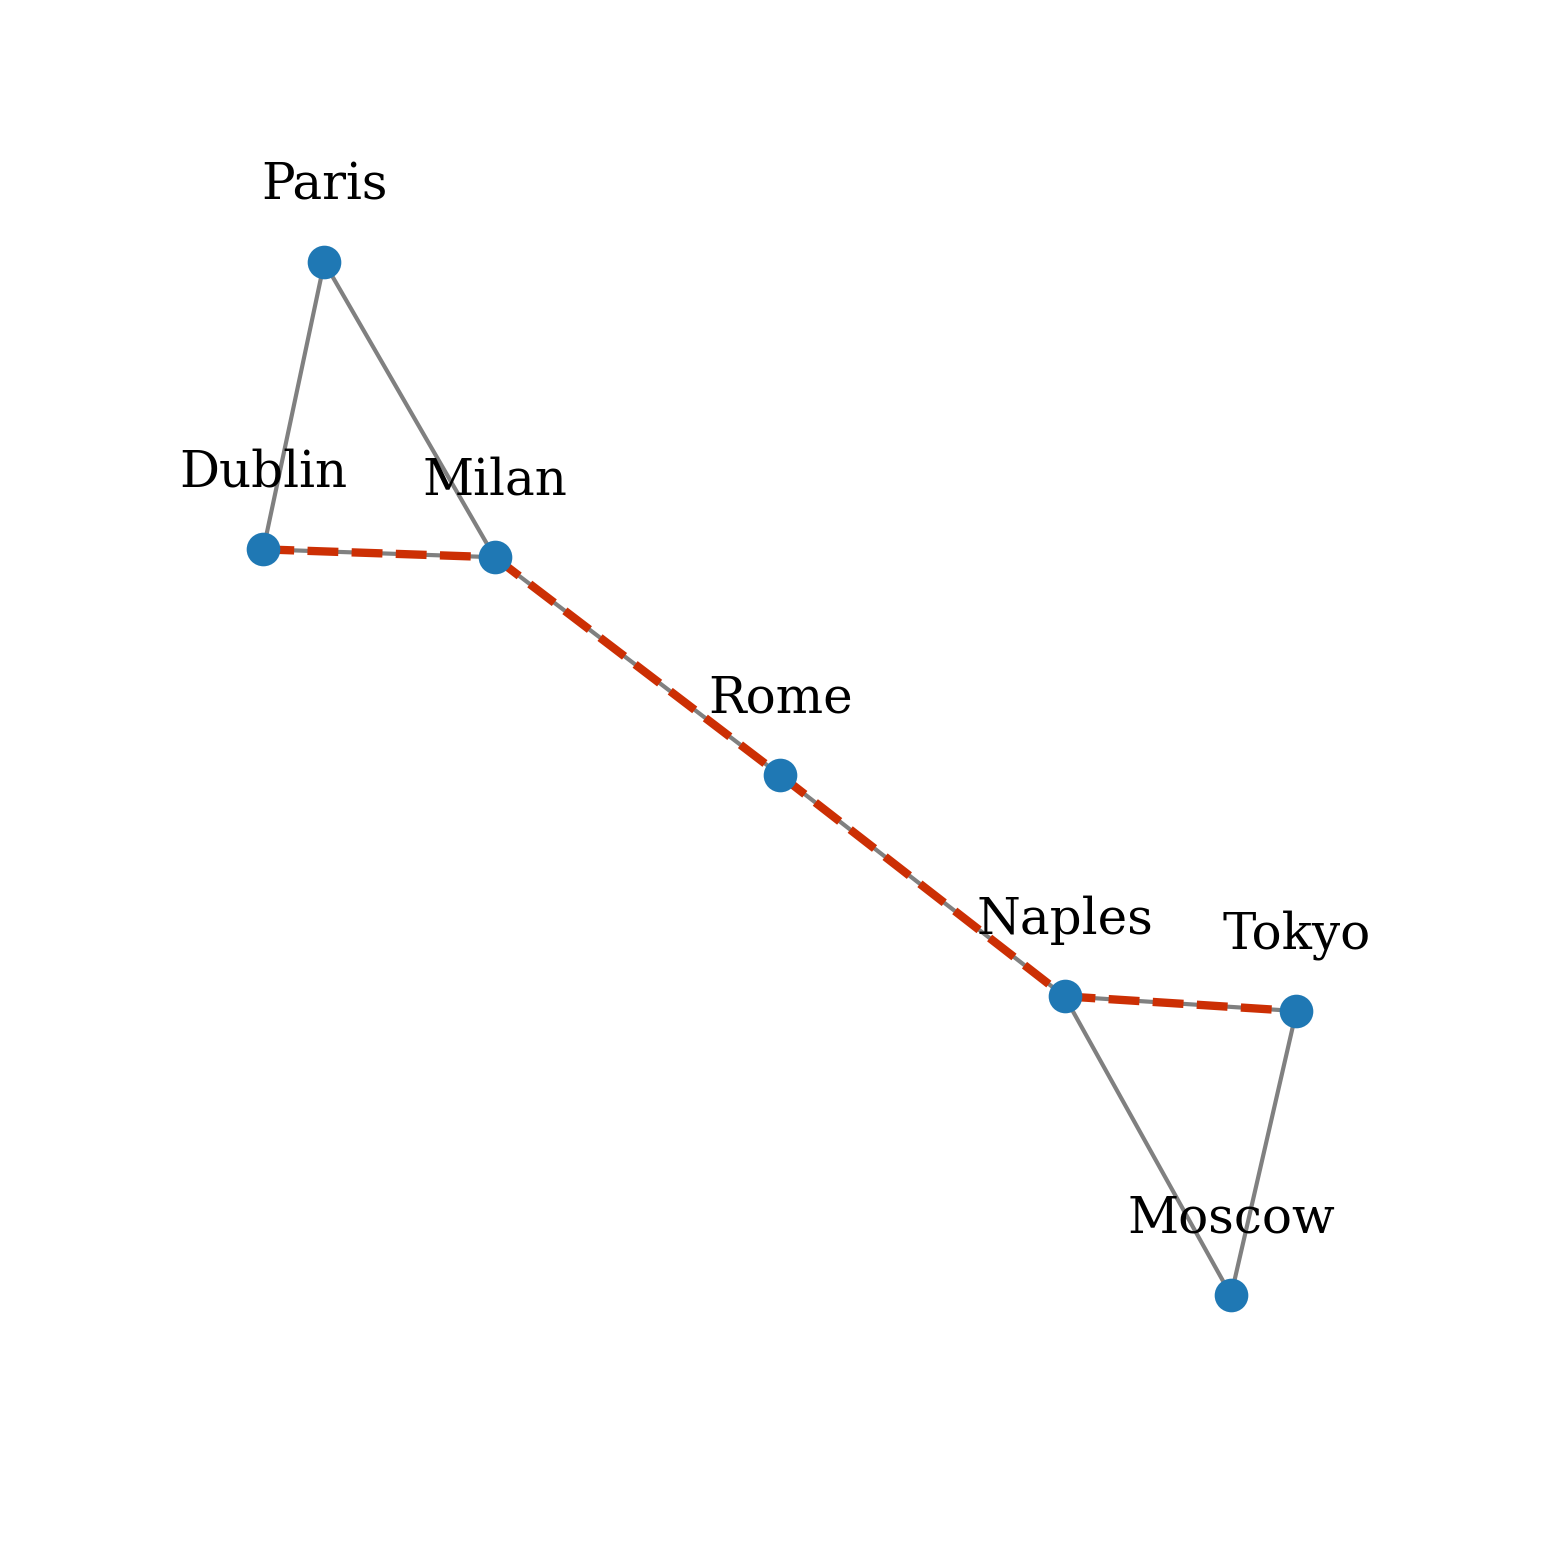

In [8]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')


# Characteristic path lenght


In [9]:
nx.average_shortest_path_length(G)


2.1904761904761907

# Efficiency


<i>Global efficiency</i> is the average of the inverse shortest path length for all pairs of nodes. 
<br>
<i>The local efficiency</i> of a node can be computed by considering only the neighborhoodof the node in the calculation, without the node itself.
<br>
Efficiency is at a maximum when a graph is fully connected, while it is minimal for
completely disconnected graphs. Intuitively, the shorter the path, the lower the measure

In [10]:
print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667


In the following , two examples of graphs are plotted. As observed, a fully
connected graph on the left presents a higher level of efficiency compared to a circular
graph on the right. In a fully connected graph, each node can be reached from any other
node in the graph, and information is exchanged rapidly across the network. However,
in a circular graph, several nodes should instead be traversed to reach the target node,
making it less efficient:

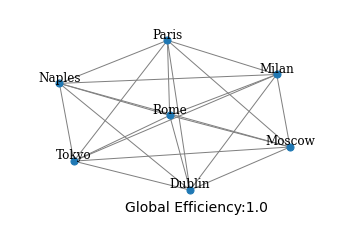

In [13]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

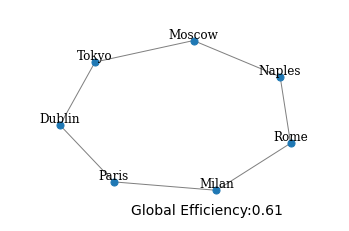

In [14]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

# Segregation metrics


<h4>1 Clustering coefficient</h4>

In [16]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [17]:
nx.average_clustering(G)


0.6666666666666667

In [18]:
nx.clustering(G)


{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

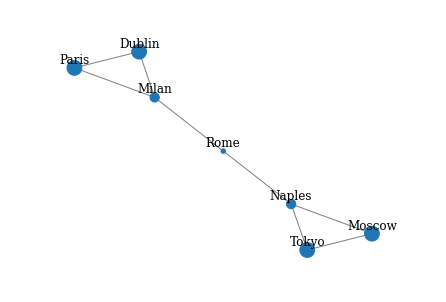

In [21]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

# Transitivity

In [23]:
nx.transitivity(G)


0.5454545454545454

# Centrality

In [24]:
nx.degree_centrality(G)


{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


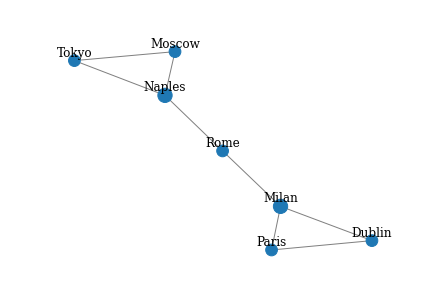

In [25]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

# Closeness centrality


In [26]:
nx.closeness_centrality(G)


{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


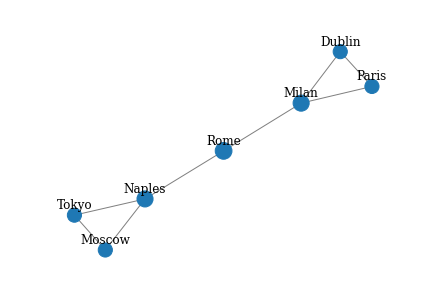

In [27]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

# Betweenness centrality


In [28]:
nx.betweenness_centrality(G)


{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


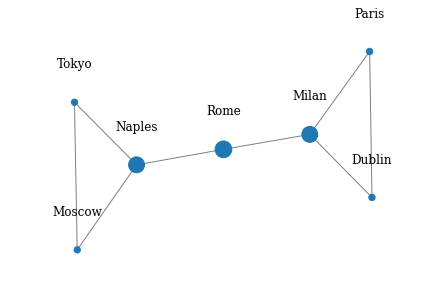

In [29]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

# Modularity

In [30]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


# Assortativity coefficient


In [31]:
nx.degree_pearson_correlation_coefficient(G)


-0.6

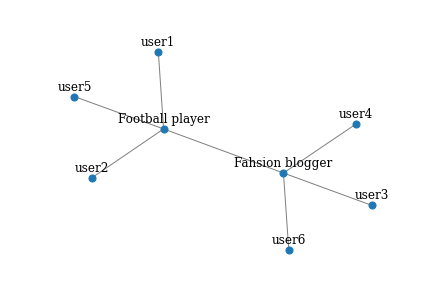

In [32]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')